# Saham Telkom Timeseries and IPM Prediction


*   IPM -> Using Structured Data method but still error
*   IPM -> LabelEncoder (75,55% prediction still erroor preedicting normal label)
*   Telkom -> Timeseries using LSTM Deep Neural Net (Wayyy to overfitted)
*   Telkom -> Using Regressor Sci-kit (KNN, Random Forest, Decision Tree)
*   Telkom -> Using Prophet (done)
*   Telkom -> Using XGBoost (done)
*   Telkom -> Using Arima|SARIMA (tbd)








## Importing Modules

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, LSTM
%matplotlib inline 

In [ ]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import gc

## Downloading data from GDrive

In [ ]:
!pip install gdown

In [ ]:
# https://drive.google.com/drive/folders/1MPy7YFiV-OcAfG3L2MNovDEQ_T8RAa45?usp=sharing
!gdown https://drive.google.com/drive/folders/1MPy7YFiV-OcAfG3L2MNovDEQ_T8RAa45 -O ./content/timeseries-orbit --folder

Retrieving folder list
Processing file 1BPipL3jhTdWGp-srS9bzxAKNRIxzdCi6 IPM.csv
Processing file 1ZHQc4c8uPLD9CtbLavgosNGUC04K2cws TLKM.JK.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1BPipL3jhTdWGp-srS9bzxAKNRIxzdCi6
To: /content/content/timeseries-orbit/IPM.csv
100% 65.3k/65.3k [00:00<00:00, 66.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZHQc4c8uPLD9CtbLavgosNGUC04K2cws
To: /content/content/timeseries-orbit/TLKM.JK.csv
100% 114k/114k [00:00<00:00, 52.6MB/s]
Download completed


## Data Exploration

### Data from IPM.csv
dari ipm csv kita bisa prediksi nilai IPM Normal, High atau Very-High
sehingga kita bisa menggunakan structured data prediction
input harapan lama sekolah, pengeluaran perkapita, rerata lama sekolah dan usia hidup

CHANGE IPM TO 0,1,2 FOR NORMAL, HIGH, VERY-HIGH using multiclass classification


In [ ]:
dataframe_ipm = pd.read_csv('./content/timeseries-orbit/IPM.csv')
original_dataframe_ipm = dataframe_ipm.copy(deep=True)
# dataframe_ipm['IPM_NUM'] = dataframe_ipm['IPM']
display(dataframe_ipm.head(10))

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
5,13.04,8577,8.21,68.74,Normal
6,14.28,10780,9.86,68.86,High
7,14.61,9593,9.55,67.99,High
8,14.73,9644,10.33,69.79,High
9,14.47,9860,9.00,66.95,High


In [ ]:
display(dataframe_ipm.describe())
display(dataframe_ipm.dtypes)
print("There is null data: %d" % (dataframe_ipm.isnull().values.any()))

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


Harapan_Lama_Sekolah     float64
Pengeluaran_Perkapita      int64
Rerata_Lama_Sekolah      float64
Usia_Harapan_Hidup       float64
IPM                       object
dtype: object

There is null data: 0


#### Mapping  IPM TO 0,1,2,3 FOR Low,Normal, High, Very-High using multiclass classification 

In [ ]:
mykeyword = ['IPM_Low', 'IPM_Normal', 'IPM_High', 'IPM_Very-High']
for i in mykeyword:
    dataframe_ipm[i] = dataframe_ipm.IPM.str.count(i)

In [ ]:
dataframe_ipm.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM,IPM_Low,IPM_Normal,IPM_High,IPM_Very-High
0,14.36,9572,9.37,69.96,High,0,0,0,0
1,13.90,7148,9.48,65.28,Normal,0,0,0,0
2,14.32,8776,8.68,67.43,Normal,0,0,0,0
3,14.60,8180,8.88,64.40,Normal,0,0,0,0
4,14.01,8030,9.67,68.22,Normal,0,0,0,0


In [ ]:
# dataframe_ipm['IPM_NUM'].replace(to_replace = ['Low','Normal', 'High', 'Very-High'], value = [0, 1, 2, 3], inplace = True)
# display(dataframe_ipm.head(10))

Popping out the IPM

In [ ]:
dataframe_ipm.pop('IPM')
display(dataframe_ipm.head(10))

#### Splitting data into Train and Validation

In [ ]:
val_dataframe_ipm = dataframe_ipm.sample(frac=0.4)
train_dataframe_ipm= dataframe_ipm.drop(val_dataframe_ipm.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe_ipm), len(val_dataframe_ipm))
)

Using 1318 samples for training and 878 for validation


In [ ]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = pd.concat([dataframe.pop(key) for key in mykeyword], axis=1)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds
train_ds = dataframe_to_dataset(train_dataframe_ipm)
val_ds = dataframe_to_dataset(val_dataframe_ipm)

In [ ]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Output:", y)

Input: {'Harapan_Lama_Sekolah': <tf.Tensor: shape=(), dtype=float64, numpy=13.48>, 'Pengeluaran_Perkapita': <tf.Tensor: shape=(), dtype=int64, numpy=8720>, 'Rerata_Lama_Sekolah': <tf.Tensor: shape=(), dtype=float64, numpy=8.92>, 'Usia_Harapan_Hidup': <tf.Tensor: shape=(), dtype=float64, numpy=61.85>}
Output: tf.Tensor([0 0 0 0], shape=(4,), dtype=int64)


In [ ]:
train_ds = train_ds.batch(16)
val_ds = val_ds.batch(16)

#### Feature preprocessing with Keras layers

In [ ]:
from tensorflow.python.keras.layers import IntegerLookup
from tensorflow.python.keras.layers import Normalization
from tensorflow.python.keras.layers import StringLookup

def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [ ]:
# Harapan_Lama_Sekolah     float64
# Pengeluaran_Perkapita      int64
# Rerata_Lama_Sekolah      float64
# Usia_Harapan_Hidup       float64
Harapan_Lama_Sekolah = keras.Input(shape = (1,), name='Harapan_Lama_Sekolah')
Pengeluaran_Perkapita = keras.Input(shape = (1,), name='Pengeluaran_Perkapita')
Rerata_Lama_Sekolah = keras.Input(shape = (1,), name='Rerata_Lama_Sekolah')
Usia_Harapan_Hidup = keras.Input(shape = (1,), name='Usia_Harapan_Hidup')
all_inputs = [
              Harapan_Lama_Sekolah, Pengeluaran_Perkapita, Rerata_Lama_Sekolah, Usia_Harapan_Hidup 
]

In [ ]:
Harapan_Lama_Sekolah_encoded = encode_numerical_feature(Harapan_Lama_Sekolah, 'Harapan_Lama_Sekolah', train_ds)
Pengeluaran_Perkapita_encoded = encode_numerical_feature(Pengeluaran_Perkapita, 'Pengeluaran_Perkapita', train_ds)
Rerata_Lama_Sekolah_encoded = encode_numerical_feature(Rerata_Lama_Sekolah, 'Rerata_Lama_Sekolah', train_ds)
Usia_Harapan_Hidup_encoded = encode_numerical_feature(Usia_Harapan_Hidup, 'Usia_Harapan_Hidup', train_ds)
all_features = layers.concatenate(
    [
     Harapan_Lama_Sekolah_encoded, Pengeluaran_Perkapita_encoded, Rerata_Lama_Sekolah_encoded, Usia_Harapan_Hidup_encoded
    ]
)

#### Model Training

In [ ]:

x = layers.Dense(64, activation="relu")(all_features)
x = layers.Dropout(0.2)(x)
# x = layers.Dense(32, activation= "relu")(x)
output = layers.Dense(4)(x)
model = keras.Model(inputs=all_inputs, outputs = output)
model.compile("adam", loss=tf.keras.losses.binary_crossentropy(), metrics=["accuracy"])

TypeError: binary_crossentropy() missing 2 required positional arguments: 'y_true' and 'y_pred'

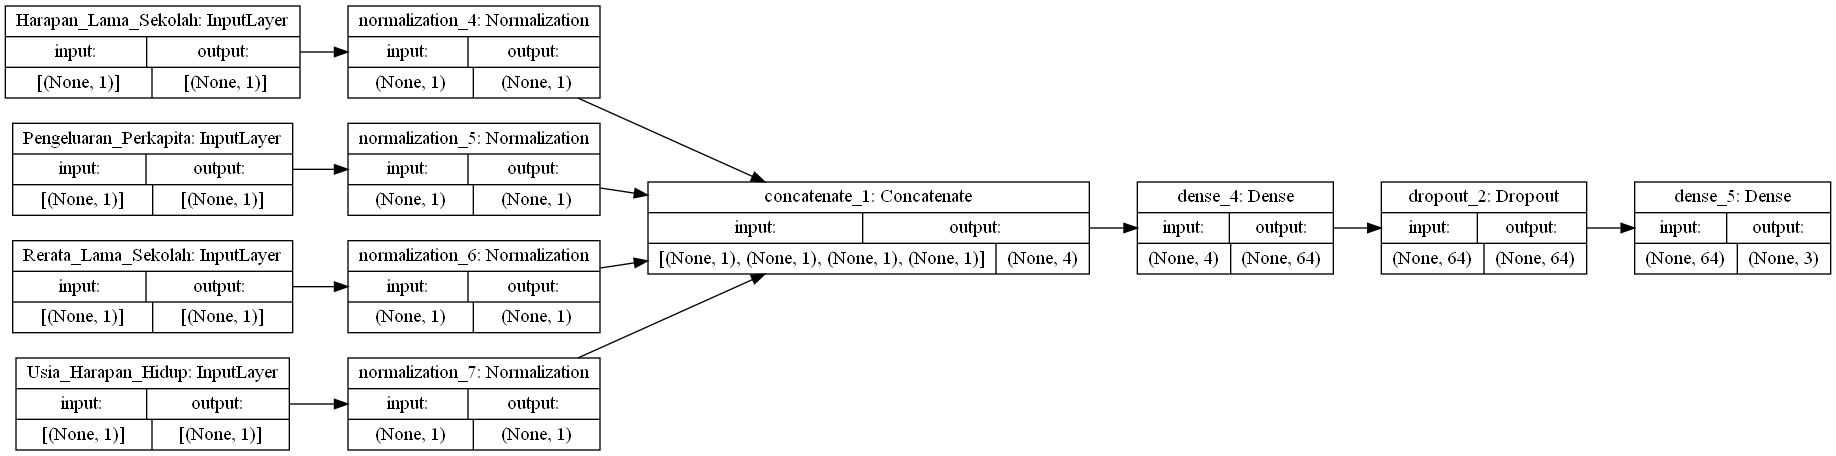

In [ ]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds)

### IPM using LabelEncoder

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd 
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn
import random 
import time 

from sklearn import preprocessing, model_selection


from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [ ]:
dataframe_ipm

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
# from sklearn.utils import shuffle
data = shuffle(dataframe_ipm)

i = 8
data_to_predict = data[:i].reset_index(drop = True)
predict_ipm = data_to_predict.IPM 
predict_ipm = np.array(predict_ipm)
prediction = np.array(data_to_predict.drop(['IPM'],axis= 1))

data = data[i:].reset_index(drop = True)

In [ ]:
prediction

array([[1.2350e+01, 9.7350e+03, 8.5200e+00, 6.6160e+01],
       [1.4280e+01, 1.0780e+04, 9.8600e+00, 6.8860e+01],
       [1.3290e+01, 8.0160e+03, 9.7100e+00, 6.9510e+01],
       [1.3170e+01, 9.2770e+03, 7.1300e+00, 6.7580e+01],
       [1.4530e+01, 9.9670e+03, 8.8600e+00, 6.9810e+01],
       [1.2270e+01, 1.1616e+04, 7.8700e+00, 6.9170e+01],
       [1.3230e+01, 1.1160e+04, 8.7500e+00, 7.6600e+01],
       [1.2590e+01, 6.3900e+03, 7.6600e+00, 6.2100e+01]])

In [ ]:
X = data.drop(['IPM'], axis = 1)
X = np.array(X)
Y = data['IPM']

In [ ]:
# Transform name species into numerical values 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
#print(Y)

# We have 3 classes : the output looks like : 
#0,0,1 : Class 1
#0,1,0 : Class 2
#1,0,0 : Class 3

In [ ]:
print(Y)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [ ]:
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,13.85,14484,10.69,71.60,High
1,12.63,10114,7.92,70.51,Normal
2,14.02,10733,8.99,69.47,High
3,13.83,14443,10.51,71.45,High
4,12.78,11098,10.09,70.33,High
...,...,...,...,...,...
2183,12.05,12794,8.06,70.64,High
2184,12.33,11369,7.16,70.37,Normal
2185,12.78,5901,6.87,64.97,Normal
2186,12.96,11608,7.46,74.48,High


In [ ]:
input_dim = len(data.columns) - 1

model = Sequential([
    tf.keras.layers.Dense(8, activation = 'relu', input_dim = input_dim),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])
# model = Sequential()
# model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
# model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 8)                 40        
                                                                 
 dense_52 (Dense)            (None, 32)                288       
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 4)                 132       
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 16, validation_data = (x_val, y_val))

Epoch 1/100
82/82 [==============================] - 1s 5ms/step - loss: 0.8617 - accuracy: 0.6570 - val_loss: 0.8268 - val_accuracy: 0.6735
Epoch 2/100
82/82 [==============================] - 0s 5ms/step - loss: 0.8461 - accuracy: 0.6791 - val_loss: 0.8192 - val_accuracy: 0.7374
Epoch 3/100
82/82 [==============================] - 0s 5ms/step - loss: 0.8417 - accuracy: 0.6982 - val_loss: 0.8117 - val_accuracy: 0.7100
Epoch 4/100
82/82 [==============================] - 1s 6ms/step - loss: 0.8403 - accuracy: 0.6913 - val_loss: 0.8149 - val_accuracy: 0.7260
Epoch 5/100
82/82 [==============================] - 1s 6ms/step - loss: 0.8377 - accuracy: 0.7043 - val_loss: 0.8189 - val_accuracy: 0.6644
Epoch 6/100
82/82 [==============================] - 1s 6ms/step - loss: 0.8413 - accuracy: 0.6791 - val_loss: 0.8141 - val_accuracy: 0.7511
Epoch 7/100
82/82 [==============================] - 0s 5ms/step - loss: 0.8306 - accuracy: 0.6951 - val_loss: 0.8100 - val_accuracy: 0.7603
Epoch 8/100
8

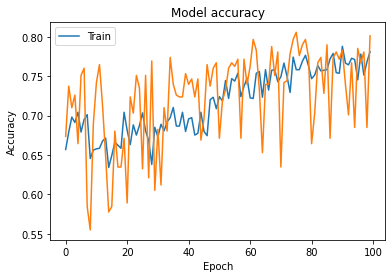

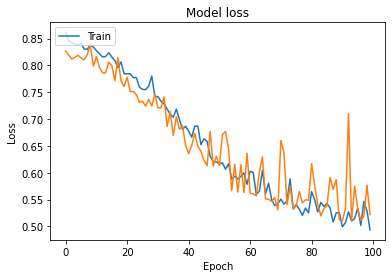

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7580

accuracy: 75.80%


In [ ]:
predictions = model.predict(prediction)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)

for i, j in zip(prediction_ , predict_ipm):
    print( " the NeuralNet predict {}, and the IPM to find is {}".format(i,j))

 the NeuralNet predict High, and the IPM to find is Normal
 the NeuralNet predict High, and the IPM to find is High
 the NeuralNet predict High, and the IPM to find is Normal
 the NeuralNet predict High, and the IPM to find is Normal
 the NeuralNet predict High, and the IPM to find is High
 the NeuralNet predict High, and the IPM to find is Normal
 the NeuralNet predict High, and the IPM to find is High
 the NeuralNet predict High, and the IPM to find is Normal


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Data TLKM 

#### Telkom dataset import

In [ ]:
data = pd.read_csv('./content/timeseries-orbit/TLKM.JK.csv')
display(data.head(10))
original_data = data.copy(deep=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
5,2017-01-09,4000.0,4030.0,3990.0,4020.0,3343.399414,85713200.0
6,2017-01-10,4030.0,4030.0,3960.0,4000.0,3326.765381,44608000.0
7,2017-01-11,3960.0,4000.0,3950.0,3960.0,3293.497559,47226300.0
8,2017-01-12,3920.0,3970.0,3920.0,3960.0,3293.497559,45738500.0
9,2017-01-13,3930.0,3970.0,3930.0,3950.0,3285.180664,64704600.0


In [ ]:
display(data.describe())
display(data.dtypes)
print("There is null data: %d" % (data.isnull().values.any()))

,Open,High,Low,Close,Adj Close,Volume
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03
mean,3827.741027,3869.106263,3785.608726,3827.171006,3416.287764,1.021061e+08
std,490.449096,487.302987,492.470774,492.369542,462.616891,6.629501e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2289.641846,0.000000e+00
25%,3450.000000,3490.000000,3400.000000,3450.000000,3111.957031,6.168190e+07
50%,3870.000000,3900.000000,3840.000000,3870.000000,3357.914063,8.730300e+07
75%,4190.000000,4220.000000,4150.000000,4190.000000,3708.230957,1.234112e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4750.000000,6.241426e+08


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

There is null data: 1


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

#### Data Visualization

##### Open and Close Visualization

In [ ]:
# We use Plotly to create the plots https://plot.ly/python/
trace1 = go.Scatter(
    x = data['Date'],
    y = data['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = data['Date'],
    y = data['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = data['Date'],
    y = data['High'].astype(float),
    mode = 'lines',
    name = 'High'
)
trace4 = go.Scatter(
    x = data['Date'],
    y = data['Low'].astype(float),
    mode = 'lines',
    name = 'Low'
)

layout = dict(
    title='Historical TLKM Prices (2017-2022) Open and Close',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data_trace = [trace1,trace2,trace3,trace4]
fig = dict(data=data_trace, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

##### Volume Visualization

In [ ]:
trace1 = go.Scatter(
    x = data['Date'],
    y = data['Volume'].astype(float),
    mode = 'lines',
    name = 'Telkom Price (Open)'
)

layout = dict(
    title='Historical Telkom Volume (IDR) (2017-2022)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data_trace = [trace1]
fig = dict(data=data_trace, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

##### Adj Close vs Close Visualization

In [ ]:
trace1 = go.Scatter(
    x = data['Date'],
    y = data['Adj Close'].astype(float),
    mode = 'lines',
    name = 'Telkom Price (AdjClose)'
)
trace2 = go.Scatter(
    x = data['Date'],
    y = data['Close'].astype(float),
    mode = 'lines',
    name = 'Telkom Price (Close)'
)

layout = dict(
    title='Historical Telkom Volume (IDR) (2017-2022)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data_trace = [trace1, trace2]
fig = dict(data=data_trace, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

##### Correlations between data using Heatmap

In [ ]:
correlations_check = data[['Date', 'Open', 'Close', 'Low', 'High', 'Adj Close']]
correlations_check.head()

,Date,Open,Close,Low,High,Adj Close
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592
1,2017-01-03,3950.0,3950.0,3920.0,3990.0,3285.180664
2,2017-01-04,3880.0,3950.0,3880.0,3980.0,3285.180664
3,2017-01-05,3960.0,3950.0,3940.0,4030.0,3285.180664
4,2017-01-06,3970.0,4000.0,3960.0,4010.0,3326.765381


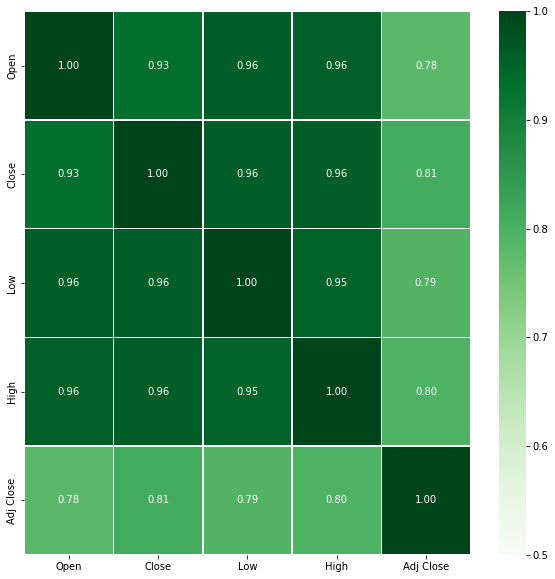

In [ ]:
corr = correlations_check.corr(method = 'kendall')
f, ax = plt.subplots(figsize = (10,10))
fx = sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, ax=ax, cmap='Greens', vmin=0.5)

#### Data Timeseries to predict

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


##### Predict TLKM Open

In [ ]:
# data['Date'] = data['Data'].dt.tz_localize(None)
# data = data.groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
data = data.set_index('Date')
data_open = data[['Open']]
data_open['Open'].fillna(method='ffill', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_open

,Open
Date,
2017-01-02,3980.0
2017-01-03,3950.0
2017-01-04,3880.0
2017-01-05,3960.0
2017-01-06,3970.0
...,...
2022-08-26,4510.0
2022-08-29,4370.0
2022-08-30,4580.0


In [ ]:
split_date = '2022-01-02'
data_open_train = data_open.loc[data_open.index <= split_date].copy()
data_open_test = data_open.loc[data_open.index > split_date].copy()

In [ ]:
data_open_test

,Open
Date,
2022-01-03,4060.0
2022-01-04,4180.0
2022-01-05,4150.0
2022-01-06,4090.0
2022-01-07,4120.0
...,...
2022-08-26,4510.0
2022-08-29,4370.0
2022-08-30,4580.0


In [ ]:
data_open_train

,Open
Date,
2017-01-02,3980.0
2017-01-03,3950.0
2017-01-04,3880.0
2017-01-05,3960.0
2017-01-06,3970.0
...,...
2021-12-24,4160.0
2021-12-27,4150.0
2021-12-28,4080.0


###### Training Data For Open TLKM

In [ ]:
# Data preprocess
training_set = data_open_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [ ]:
X_train.shape

(1261, 1, 1)

In [ ]:
y_train.shape

(1261, 1)

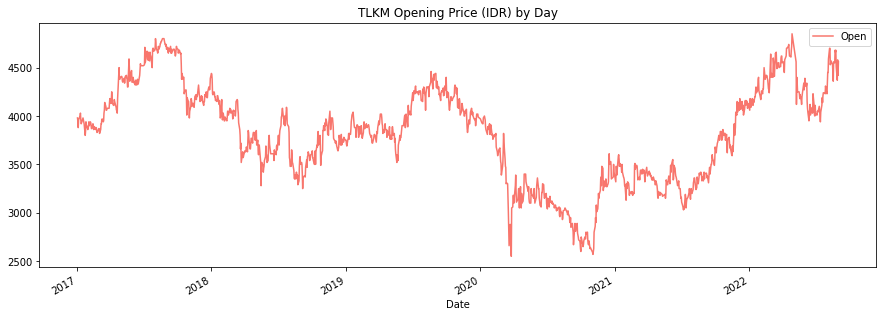

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data_open.plot(style='', figsize=(15,5), color=color_pal[0], title='TLKM Opening Price (IDR) by Day')

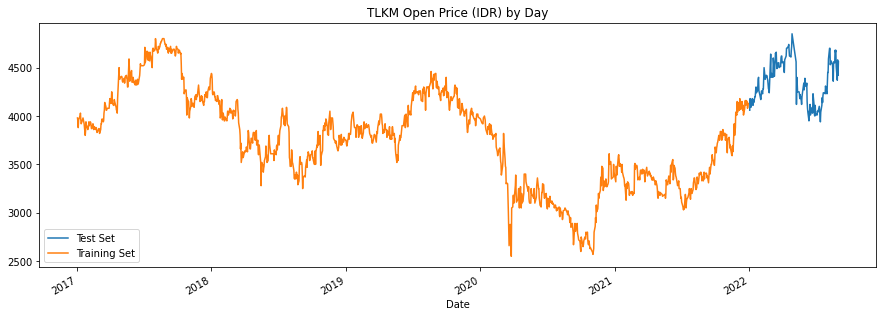

In [ ]:
_ = data_open_test\
    .rename(columns={'Open': 'Test Set'}) \
    .join(data_open_train.rename(columns={'Open': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='TLKM Open Price (IDR) by Day', style='')

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model_lstm = Sequential()
model_lstm.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


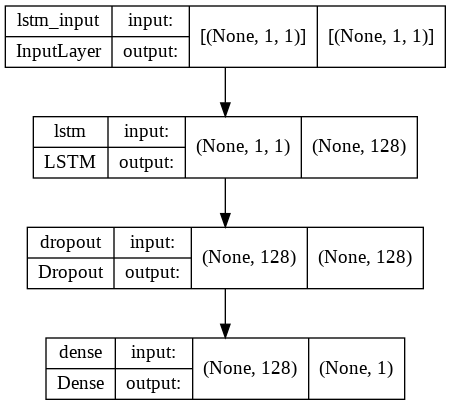

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=False)

In [ ]:
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
127/127 - 2s - loss: 0.1318 - 2s/epoch - 14ms/step
Epoch 2/100
127/127 - 0s - loss: 0.0716 - 322ms/epoch - 3ms/step
Epoch 3/100
127/127 - 0s - loss: 0.0642 - 325ms/epoch - 3ms/step
Epoch 4/100
127/127 - 0s - loss: 0.0518 - 330ms/epoch - 3ms/step
Epoch 5/100
127/127 - 0s - loss: 0.0513 - 301ms/epoch - 2ms/step
Epoch 6/100
127/127 - 0s - loss: 0.0433 - 308ms/epoch - 2ms/step
Epoch 7/100
127/127 - 0s - loss: 0.0410 - 304ms/epoch - 2ms/step
Epoch 8/100
127/127 - 0s - loss: 0.0339 - 306ms/epoch - 2ms/step
Epoch 9/100
127/127 - 0s - loss: 0.0301 - 302ms/epoch - 2ms/step
Epoch 10/100
127/127 - 0s - loss: 0.0276 - 305ms/epoch - 2ms/step
Epoch 11/100
127/127 - 0s - loss: 0.0236 - 295ms/epoch - 2ms/step
Epoch 12/100
127/127 - 0s - loss: 0.0221 - 328ms/epoch - 3ms/step
Epoch 13/100
127/127 - 0s - loss: 0.0194 - 286ms/epoch - 2ms/step
Epoch 14/100
127/127 - 0s - loss: 0.0175 - 286ms/epoch - 2ms/step
Epoch 15/100
127/127 - 0s - loss: 0.0172 - 309ms/epoch - 2ms/step
Epoch 16/100
127/127 

In [ ]:
# Making the predictions
test_set = data_open_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_TLKM_price = model_lstm.predict(inputs)
predicted_TLKM_price = sc.inverse_transform(predicted_TLKM_price)

In [ ]:
data_open_test['Open_Price_Predictions'] = predicted_TLKM_price
dataframe_concatenated = pd.concat([data_open_test, data_open_train], sort = False)

In [ ]:
#saving the predicted values in a common data frame for future comparision
final_data = dataframe_concatenated
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Open_Price_Predictions': 'lstm'})
final_data = final_data[['Date','Open','lstm']]

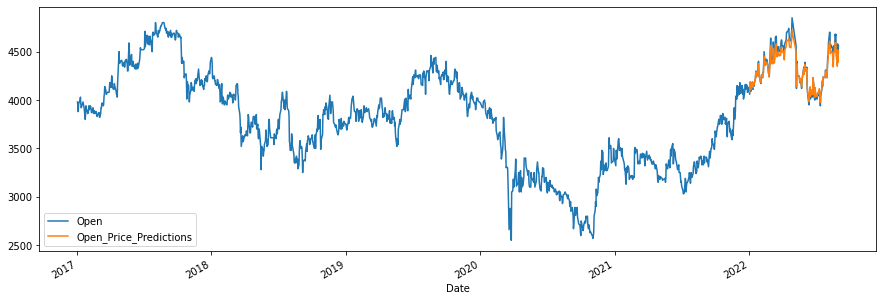

In [ ]:
_ = dataframe_concatenated[['Open','Open_Price_Predictions']].plot(figsize=(15, 5))

In [ ]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_open_test['Open'],
                   y_pred=data_open_test['Open_Price_Predictions'])

1916.5404503595084

In [ ]:
mean_absolute_error(y_true=data_open_test['Open'],
                   y_pred=data_open_test['Open_Price_Predictions'])

33.57068023681641

In [ ]:
# model_lstm
model_lstm.save('/content/model/model_lstm') 

# Both output overfit using tensorflow, I think can change the x and y inputs
ntahlah abis ini ngapain, mau test pake XGBoost or prophet

### Trying Using regressor using timeseries

#### Telkom dataset import

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('./content/timeseries-orbit/TLKM.JK.csv')
display(data.head(5))
original_data = data.copy(deep=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


In [ ]:
display(data.describe())
display(data.dtypes)
print("There is null data: %d" % (data.isnull().values.any()))

,Open,High,Low,Close,Adj Close,Volume
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03
mean,3827.741027,3869.106263,3785.608726,3827.171006,3416.287764,1.021061e+08
std,490.449096,487.302987,492.470774,492.369542,462.616891,6.629501e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2289.641846,0.000000e+00
25%,3450.000000,3490.000000,3400.000000,3450.000000,3111.957031,6.168190e+07
50%,3870.000000,3900.000000,3840.000000,3870.000000,3357.914063,8.730300e+07
75%,4190.000000,4220.000000,4150.000000,4190.000000,3708.230957,1.234112e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4750.000000,6.241426e+08


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

There is null data: 1


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
# data['Date'] = data['Data'].dt.tz_localize(None)
# data = data.groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
data = data.set_index('Date')
data_open = data[['Open']]
data_open['Open'].fillna(method='ffill', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
split_date = '2022-01-02'
data_open_train = data_open.loc[data_open.index <= split_date].copy()
data_open_test = data_open.loc[data_open.index > split_date].copy()

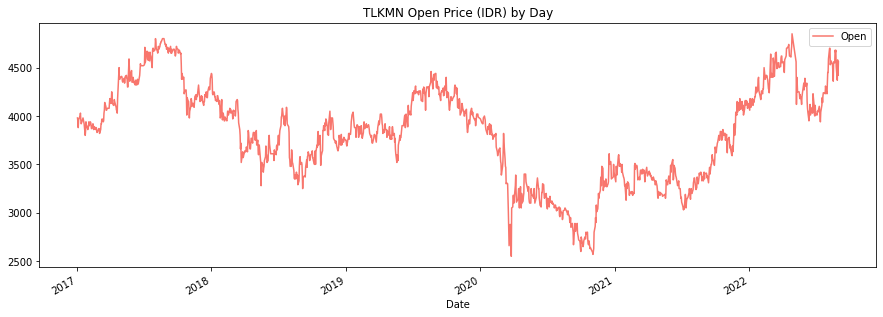

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data_open.plot(style='', figsize=(15,5), color=color_pal[0], title='TLKMN Open Price (IDR) by Day')

In [ ]:
split_date = '2022-01-02'
data_open_train = data_open.loc[data_open.index <= split_date].copy()
data_open_test = data_open.loc[data_open.index > split_date].copy()

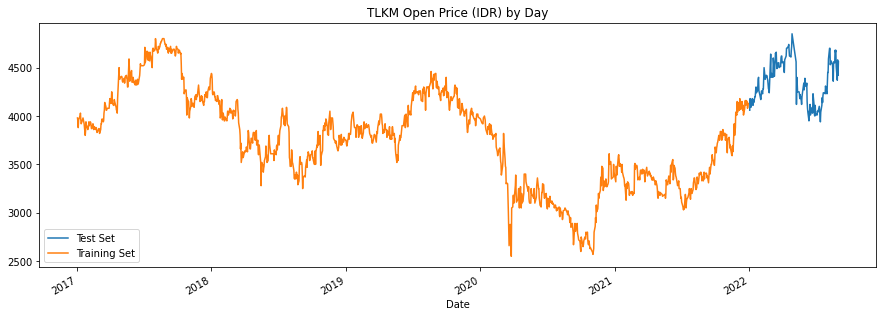

In [ ]:
_ = data_open_test \
    .rename(columns={'Open': 'Test Set'}) \
    .join(data_open_train.rename(columns={'Open': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='TLKM Open Price (IDR) by Day', style='')

##### Creating Features

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(data_open_train, label='Open')
X_test, y_test = create_features(data_open_test, label='Open')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
X_train.head(10)

,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,
2017-01-02,0,1,2017,2,2,1
2017-01-03,1,1,2017,3,3,1
2017-01-04,2,1,2017,4,4,1
2017-01-05,3,1,2017,5,5,1
2017-01-06,4,1,2017,6,6,1
2017-01-09,0,1,2017,9,9,2
2017-01-10,1,1,2017,10,10,2
2017-01-11,2,1,2017,11,11,2
2017-01-12,3,1,2017,12,12,2


##### Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
dect_reg = DecisionTreeRegressor()
ranf_reg = RandomForestRegressor(n_estimators=100)
knn_reg = KNeighborsRegressor(n_neighbors=100)

models = {"Decision tree" : dect_reg,
          "Random forest" : ranf_reg,
          "KNN" : knn_reg,
          # "SVM" : svm,
          # "Naive bayes" : naive
          }
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [ ]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
KNN,-8.355326
Random forest,-22.397005
Decision tree,-22.491210


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

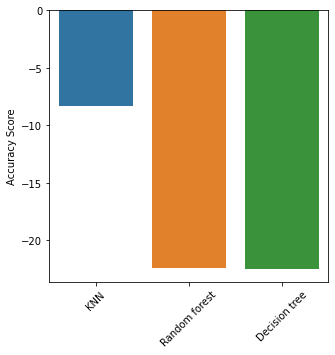

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) # Rotation of Country names...

* It seems that KNN and Random Forest algorithms are far ahead of the others.
* So let's focus on these algorithms
 
##### K Fold Cross Validation <a id="12"></a>
<hr>
    
* With K-Fold cross-validation, we obtain "K" pieces of results from different mini-training sets from our main training set.
* Then we choose the average of these results as the actual result.
* After all, by taking the standard deviation of K result, we can examine whether the data is consistent.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ranf_reg, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn_reg, X=X_train, y=y_train, cv=10)
accuracies_decision_tree = cross_val_score(estimator=dect_reg, X=X_train, y=y_train, cv=10)

In [ ]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())
print("Decision Tree Average accuracy: ", accuracies_decision_tree.mean())
print("Decision Tree Standart Deviation: ", accuracies_decision_tree.std())

Random Forest Average accuracy:  -2.7576422489196166
Random Forest Standart Deviation:  2.4138025590653687
KNN Average accuracy:  -7.158283308657003
KNN Standart Deviation:  6.870197573873969
Decision Tree Average accuracy:  -3.7478273747706377
Decision Tree Standart Deviation:  4.686894027743449


##### RandomForest


In [ ]:
model_ranf = ranf_reg
model_ranf.score(X_test, y_test)

-22.397005224078026

In [ ]:
y_pred = model_ranf.predict(X_test)
y_pred

array([3401. , 3405.8, 3451.4, 3442.4, 3425.8, 3548.7, 3572.7, 3542.4,
       3520.2, 3493. , 3487.4, 3487. , 3463.4, 3467. , 3470. , 3371.2,
       3366.4, 3353. , 3337.4, 3300.7, 3277. , 3243.8, 3262.9, 3279. ,
       3277.1, 3273.1, 3254. , 3210.3, 3211. , 3203.1, 3204.1, 3213.3,
       3206.2, 3189.7, 3213.8, 3229.8, 3232.5, 3378.6, 3462.7, 3484.1,
       3482.9, 3421.6, 3377.9, 3367.2, 3363.3, 3371.1, 3382.8, 3434.2,
       3414.2, 3408.1, 3426.7, 3430.5, 3432.3, 3383.5, 3373.6, 3350.9,
       3383.3, 3452.7, 3410.5, 3404.4, 3396.9, 3397. , 3430.4, 3401.5,
       3400.1, 3398.3, 3389.8, 3354.3, 3342.3, 3347.9, 3351. , 3332.1,
       3324.9, 3331.8, 3303.2, 3307.8, 3273.9, 3256.7, 3236.1, 3183.5,
       3188. , 3180.8, 3182.5, 3189.6, 3192.2, 3185.3, 3186.1, 3173.6,
       3202.5, 3296.1, 3296.9, 3304. , 3348.4, 3319.5, 3319.8, 3451.3,
       3457.8, 3525.5, 3523.4, 3503.2, 3389. , 3405.2, 3436.4, 3424.8,
       3397.6, 3382.8, 3382. , 3307.5, 3297.3, 3302.3, 3319.1, 3319.5,
      

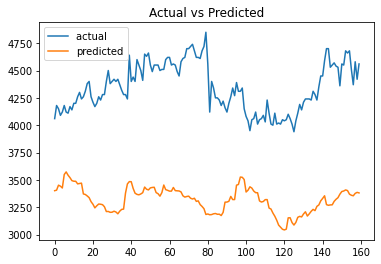

In [ ]:
df_randomForest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=df_randomForest.index
y_axis=df_randomForest.Actual
y1_axis=df_randomForest.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

##### KNN


In [ ]:
model_knn = knn_reg
model_knn.score(X_test, y_test)

-8.355326167066735

In [ ]:
y_pred = model_knn.predict(X_test)
y_pred

array([3866.8, 3867.7, 3867.7, 3868.6, 3869.6, 3869. , 3869. , 3866.3,
       3860.1, 3867.2, 3854.5, 3856.1, 3856.1, 3840.9, 3838.3, 3842.7,
       3837.7, 3830.5, 3825.5, 3819.5, 3804.1, 3786.9, 3785. , 3787.2,
       3754.1, 3762.6, 3749.9, 3741.6, 3742. , 3741.7, 3735.7, 3739.5,
       3740.2, 3748.3, 3757.2, 3748.1, 3752.6, 3740.5, 3745.2, 3746.2,
       3742.1, 3728.6, 3716.2, 3718.6, 3711.1, 3695.3, 3681. , 3674.7,
       3663.9, 3663.1, 3661.7, 3659.3, 3657.3, 3654.6, 3660.3, 3647.4,
       3638.7, 3640.1, 3641. , 3633.4, 3628.7, 3651.8, 3637.8, 3607.2,
       3607.3, 3593.4, 3589.1, 3626. , 3617.7, 3640.7, 3640.5, 3635.4,
       3632.6, 3632.4, 3635.4, 3633.6, 3648.3, 3645.1, 3632.5, 3616.4,
       3630. , 3625.5, 3624.9, 3614.8, 3618.4, 3639. , 3638.1, 3632.7,
       3641.4, 3689.6, 3676.6, 3668.9, 3670.9, 3644.9, 3659.1, 3655.6,
       3661.7, 3670. , 3675.3, 3673.8, 3669.4, 3670.8, 3695.8, 3718.9,
       3725.3, 3709.6, 3719.2, 3720.1, 3725.8, 3731.5, 3737. , 3719.5,
      

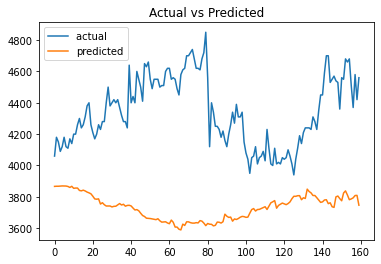

In [ ]:
df_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=df_KNN.index
y_axis=df_KNN.Actual
y1_axis=df_KNN.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

##### Decision Tree


In [ ]:
model_dect = dect_reg
model_dect.score(X_test, y_test)

-22.49120951522153

In [ ]:
y_pred = model_dect.predict(X_test)
y_pred

array([3320., 3320., 3470., 3470., 3390., 3590., 3590., 3550., 3480.,
       3480., 3480., 3480., 3420., 3420., 3420., 3370., 3370., 3360.,
       3340., 3290., 3300., 3250., 3270., 3320., 3300., 3300., 3250.,
       3180., 3180., 3200., 3200., 3220., 3190., 3180., 3210., 3200.,
       3220., 3510., 3450., 3490., 3490., 3420., 3360., 3360., 3340.,
       3340., 3340., 3440., 3440., 3400., 3410., 3450., 3440., 3390.,
       3390., 3320., 3400., 3470., 3420., 3420., 3380., 3390., 3430.,
       3400., 3400., 3390., 3380., 3340., 3340., 3360., 3360., 3330.,
       3330., 3340., 3290., 3330., 3280., 3280., 3240., 3160., 3190.,
       3190., 3170., 3170., 3170., 3190., 3190., 3150., 3190., 3290.,
       3290., 3290., 3350., 3300., 3300., 3490., 3420., 3540., 3550.,
       3550., 3340., 3490., 3460., 3460., 3380., 3380., 3490., 3280.,
       3280., 3300., 3330., 3330., 3250., 3250., 3190., 3150., 3160.,
       3070., 3070., 3050., 3030., 3060., 3190., 3190., 3160., 3050.,
       3110., 3160.,

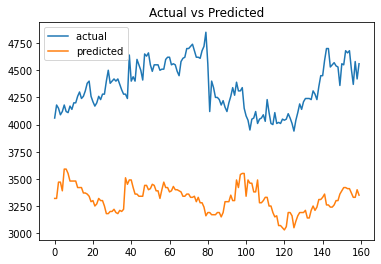

In [ ]:
df_DecTree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=df_DecTree.index
y_axis=df_DecTree.Actual
y1_axis=df_DecTree.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

#### Graph Regressor

In [ ]:
final_data

,Date,Open,lstm
0,2022-01-03,4060.0,4085.514648
1,2022-01-04,4180.0,4191.854492
2,2022-01-05,4150.0,4165.610352
3,2022-01-06,4090.0,4112.439941
4,2022-01-07,4120.0,4139.138184
...,...,...,...
1417,2021-12-24,4160.0,NaN
1418,2021-12-27,4150.0,NaN
1419,2021-12-28,4080.0,NaN
1420,2021-12-29,4100.0,NaN


In [ ]:
# Create traces
trace0 = go.Scatter(
    x = df_randomForest['Date'],
    y = final_data['Open'],
    mode = 'lines+markers',
    name = 'Real Price'
)
trace1 = go.Scatter(
    x = df_randomForest['Date'],
    y = df_randomForest['Predicted'],
    mode = 'lines+markers',
    name = 'Random Forest Prediction'
)
trace2 = go.Scatter(
    x = df_KNN['Date'],
    y = df_KNN['Predicted'],
    mode = 'lines+markers',
    name = 'KNN Prediction'
)
trace3 = go.Scatter(
    x = df_DecTree['Date'],
    y = df_DecTree['Predicted'],
    mode = 'lines+markers',
    name = 'Decision Tree Prediction'
)
# Edit the layout
layout = dict(title = 'Comparision of Random Forest, KNN and Decision Tree',
              xaxis = dict(title = 'Daily'),
              yaxis = dict(title = 'Prices (IDR)'),
              )

data = [trace0, trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

#### Outputing Scikit Model

In [ ]:
from joblib import dump, load
dump(model_ranf, 'ranf_reg.joblib')
dump(model_knn, 'knn_reg.joblib') 
dump(model_dect, 'dec_reg.joblib') 

['dec_reg.joblib']

## Using FBProphet

#### Installing fbprophet for googlecolab

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

### Pre-Requisite


In [ ]:
data = pd.read_csv('./content/timeseries-orbit/TLKM.JK.csv')
display(data.head(10))
original_data = data.copy(deep=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
5,2017-01-09,4000.0,4030.0,3990.0,4020.0,3343.399414,85713200.0
6,2017-01-10,4030.0,4030.0,3960.0,4000.0,3326.765381,44608000.0
7,2017-01-11,3960.0,4000.0,3950.0,3960.0,3293.497559,47226300.0
8,2017-01-12,3920.0,3970.0,3920.0,3960.0,3293.497559,45738500.0
9,2017-01-13,3930.0,3970.0,3930.0,3950.0,3285.180664,64704600.0


In [ ]:
data = data.set_index('Date')
data = data[['Open']]
data['Open'].fillna(method='ffill', inplace=True)

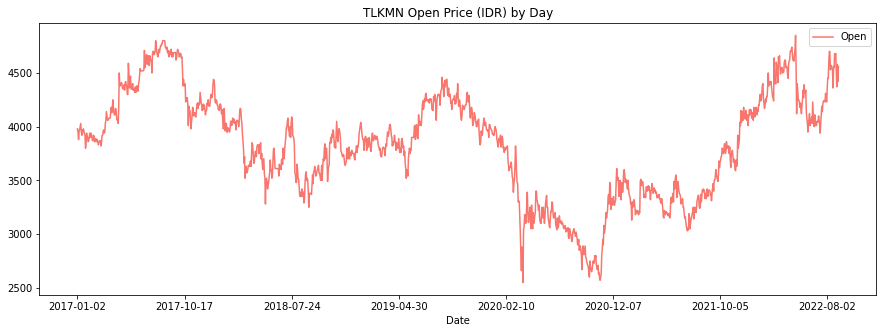

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='TLKMN Open Price (IDR) by Day')

In [ ]:
split_date = '2022-01-02'
data_open_train = data_open.loc[data_open.index <= split_date].copy()
data_open_test = data_open.loc[data_open.index > split_date].copy()

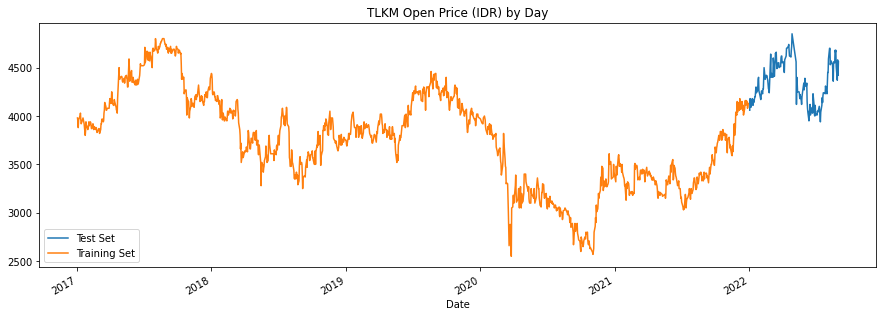

In [ ]:
_ = data_open_test \
    .rename(columns={'Open': 'Test Set'}) \
    .join(data_open_train.rename(columns={'Open': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='TLKM Open Price (IDR) by Day', style='')

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(data_open_train, label='Open')
X_test, y_test = create_features(data_open_test, label='Open')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2017-01-02,0,0,1,1,2017,2,2,1
2017-01-03,0,1,1,1,2017,3,3,1
2017-01-04,0,2,1,1,2017,4,4,1
2017-01-05,0,3,1,1,2017,5,5,1
2017-01-06,0,4,1,1,2017,6,6,1
...,...,...,...,...,...,...,...,...
2021-12-24,0,4,4,12,2021,358,24,51
2021-12-27,0,0,4,12,2021,361,27,52
2021-12-28,0,1,4,12,2021,362,28,52


#### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model_xgb =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

[10:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, min_child_weight=10)

In [ ]:
data_open_test['Open_Prediction'] = model_xgb.predict(X_test)
data_all = pd.concat([data_open_test, data_open_train], sort=False)

In [ ]:
data_all

,Open,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Open_Prediction
Date,,,,,,,,,,,
2022-01-03,4060.0,2022-01-03,0,0,1,1,2022,3,3,1,3587.405518
2022-01-04,4180.0,2022-01-04,0,1,1,1,2022,4,4,1,3544.416748
2022-01-05,4150.0,2022-01-05,0,2,1,1,2022,5,5,1,3544.416748
2022-01-06,4090.0,2022-01-06,0,3,1,1,2022,6,6,1,3545.854980
2022-01-07,4120.0,2022-01-07,0,4,1,1,2022,7,7,1,3550.724121
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4160.0,2021-12-24,0,4,4,12,2021,358,24,51,NaN
2021-12-27,4150.0,2021-12-27,0,0,4,12,2021,361,27,52,NaN
2021-12-28,4080.0,2021-12-28,0,1,4,12,2021,362,28,52,NaN


In [ ]:
data_all = data_all.reset_index()

In [ ]:
data_all

,Date,Open,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Open_Prediction
0,2022-01-03,4060.0,2022-01-03,0,0,1,1,2022,3,3,1,3587.405518
1,2022-01-04,4180.0,2022-01-04,0,1,1,1,2022,4,4,1,3544.416748
2,2022-01-05,4150.0,2022-01-05,0,2,1,1,2022,5,5,1,3544.416748
3,2022-01-06,4090.0,2022-01-06,0,3,1,1,2022,6,6,1,3545.854980
4,2022-01-07,4120.0,2022-01-07,0,4,1,1,2022,7,7,1,3550.724121
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2021-12-24,4160.0,2021-12-24,0,4,4,12,2021,358,24,51,NaN
1418,2021-12-27,4150.0,2021-12-27,0,0,4,12,2021,361,27,52,NaN
1419,2021-12-28,4080.0,2021-12-28,0,1,4,12,2021,362,28,52,NaN
1420,2021-12-29,4100.0,2021-12-29,0,2,4,12,2021,363,29,52,NaN


In [ ]:
final_data

,Date,Open,lstm
0,2022-01-03,4060.0,4085.514648
1,2022-01-04,4180.0,4191.854492
2,2022-01-05,4150.0,4165.610352
3,2022-01-06,4090.0,4112.439941
4,2022-01-07,4120.0,4139.138184
...,...,...,...
1417,2021-12-24,4160.0,NaN
1418,2021-12-27,4150.0,NaN
1419,2021-12-28,4080.0,NaN
1420,2021-12-29,4100.0,NaN


In [ ]:
#adding to final data for comparision
final_data = pd.merge(final_data, data_all, sort=False, )
final_data = final_data.rename(columns={'Open_Prediction': 'xgboost'})
final_data = final_data[['Date','Open','lstm','xgboost']]

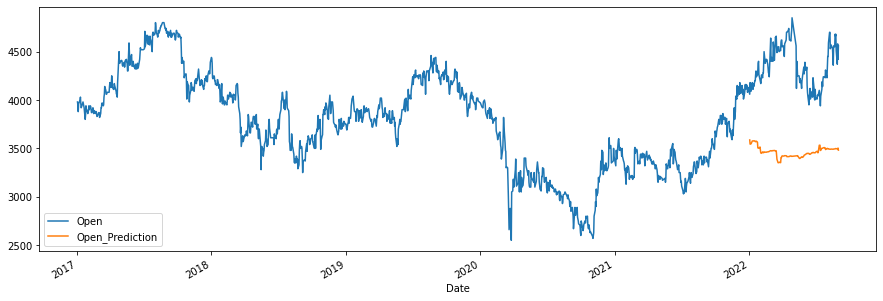

In [ ]:
data_all = data_all.set_index('Date')
_ = data_all[['Open','Open_Prediction']].plot(figsize=(15, 5))

In [ ]:
mean_squared_error(y_true=data_open_test['Open'],
                   y_pred=data_open_test['Open_Prediction'])

828309.5736646879

In [ ]:
mean_absolute_error(y_true=data_open_test['Open'],
                   y_pred=data_open_test['Open_Prediction'])

878.5597671508789

#### FBProp

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
data_open

,Open
Date,
2017-01-02,3980.0
2017-01-03,3950.0
2017-01-04,3880.0
2017-01-05,3960.0
2017-01-06,3970.0
...,...
2022-08-26,4510.0
2022-08-29,4370.0
2022-08-30,4580.0


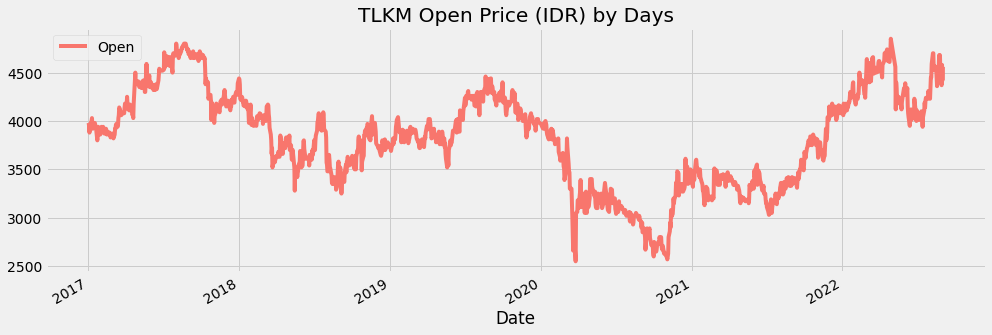

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data_open.plot(style='', figsize=(15,5), color=color_pal[0], title='TLKM Open Price (IDR) by Days')

In [ ]:
split_date = '2022-01-02'
data_open_train = data_open.loc[data_open.index <= split_date].copy()
data_open_test = data_open.loc[data_open.index > split_date].copy()

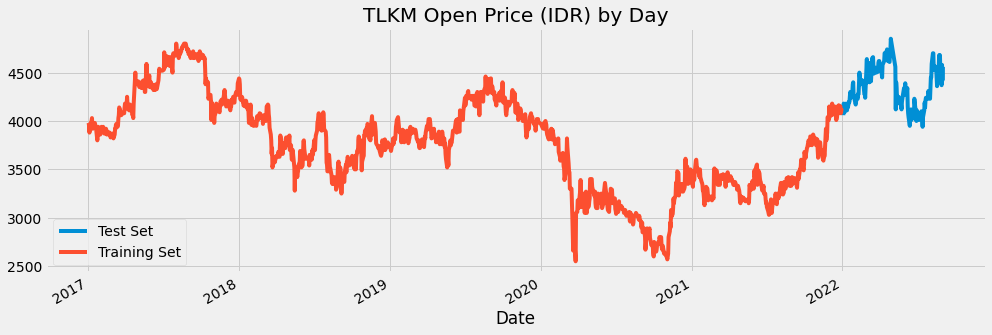

In [ ]:
_ = data_open_test\
    .rename(columns={'Open': 'Test Set'}) \
    .join(data_open_train.rename(columns={'Open': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='TLKM Open Price (IDR) by Day', style='')

In [ ]:
data_open_train = data_open_train.reset_index().rename(columns={'Date':'ds', 'Open':'y'})

In [ ]:
# Setup and train model
model_prophet = Prophet()
model_prophet.fit(data_open_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predict on training set with model
data_test_fcst = model_prophet.predict(df=data_open_test.reset_index().rename(columns={'Date':'ds'}))

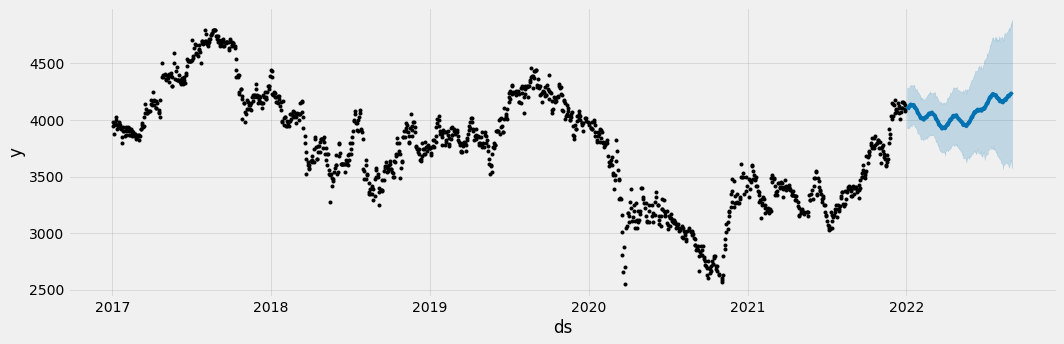

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_prophet.plot(data_test_fcst, ax=ax)

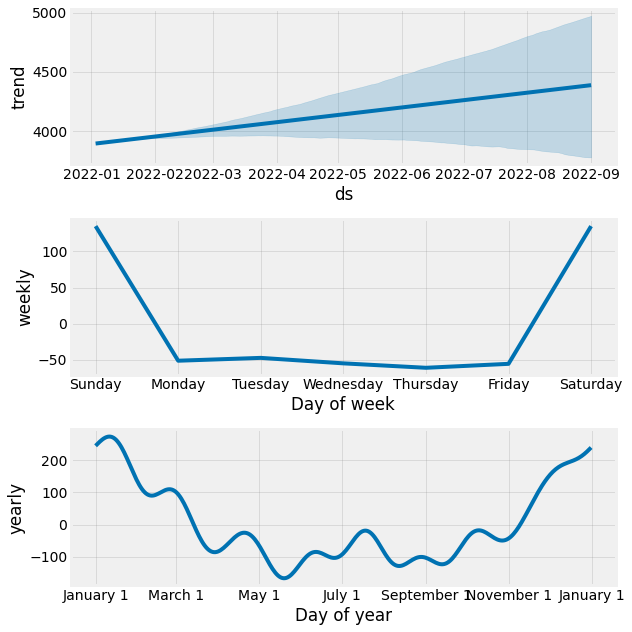

In [ ]:
# Plot the components
fig = model_prophet.plot_components(data_test_fcst)

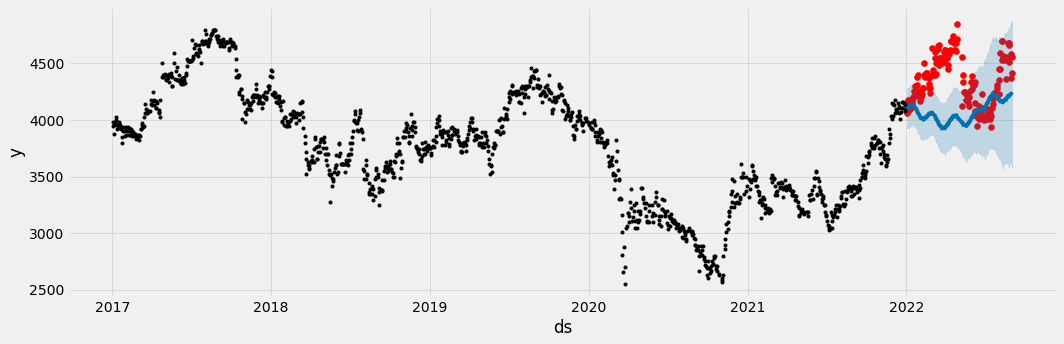

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_open_test.index, data_open_test['Open'], color='r')
fig = model_prophet.plot(data_test_fcst, ax=ax)

In [ ]:
#for comparision of predictions
data_fcst = data_test_fcst
data_fcst = data_fcst.rename(columns={'ds': 'Date'})
data_all = pd.concat([data_fcst, data_open_train], sort=False)
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'yhat': 'prophet'})
final_data = final_data[['Date','Open','lstm','xgboost','prophet']]

In [ ]:
final_data.head()

,Date,Open,lstm,xgboost,prophet
0,2022-01-03,4060.0,4085.514648,3587.405518,4096.327476
1,2022-01-04,4180.0,4191.854492,3544.416748,4106.367221
2,2022-01-05,4150.0,4165.610352,3544.416748,4104.673044
3,2022-01-06,4090.0,4112.439941,3545.854980,4104.079641
4,2022-01-07,4120.0,4139.138184,3550.724121,4114.670190


In [ ]:
mean_squared_error(y_true=data_open_test['Open'],
                   y_pred=data_test_fcst['yhat'])

138114.1420669186

In [ ]:
mean_absolute_error(y_true=data_open_test['Open'],
                   y_pred=data_test_fcst['yhat'])

300.89455591337463

In [ ]:
# Create traces
trace0 = go.Scatter(
    x = final_data['Date'],
    y = final_data['Open'],
    mode = 'lines+markers',
    name = 'Real Price'
)
trace1 = go.Scatter(
    x = final_data['Date'],
    y = final_data['lstm'],
    mode = 'lines+markers',
    name = 'LSTM Prediction'
)
trace2 = go.Scatter(
    x = final_data['Date'],
    y = final_data['xgboost'],
    mode = 'lines+markers',
    name = 'XGBoost Prediction'
)
trace3 = go.Scatter(
    x = final_data['Date'],
    y = final_data['prophet'],
    mode = 'lines+markers',
    name = 'Prophet Prediction'
)
# Edit the layout
layout = dict(title = 'Comparision of LSTM,XGBoost and Prophet',
              xaxis = dict(title = 'Daily'),
              yaxis = dict(title = 'Prices (IDR)'),
              )

data = [trace0, trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

# Final Comparison

In [ ]:
# Create traces
trace0 = go.Scatter(
    x = final_data['Date'],
    y = final_data['Open'],
    mode = 'lines+markers',
    name = 'Real Price'
)
trace1 = go.Scatter(
    x = final_data['Date'],
    y = final_data['lstm'],
    mode = 'lines+markers',
    name = 'LSTM Prediction'
)
trace2 = go.Scatter(
    x = final_data['Date'],
    y = final_data['xgboost'],
    mode = 'lines+markers',
    name = 'XGBoost Prediction'
)
trace3 = go.Scatter(
    x = final_data['Date'],
    y = final_data['prophet'],
    mode = 'lines+markers',
    name = 'Prophet Prediction'
)
trace5 = go.Scatter(
    x = df_randomForest['Date'],
    y = df_randomForest['Predicted'],
    mode = 'lines+markers',
    name = 'Random Forest Prediction'
)
trace6 = go.Scatter(
    x = df_KNN['Date'],
    y = df_KNN['Predicted'],
    mode = 'lines+markers',
    name = 'KNN Prediction'
)
trace7 = go.Scatter(
    x = df_DecTree['Date'],
    y = df_DecTree['Predicted'],
    mode = 'lines+markers',
    name = 'Decision Tree Prediction'
)
# Edit the layout
layout = dict(title = 'Comparision of LSTM, XGBoost, Prophet, Random Forest, KNN, and Decision Tree',
              xaxis = dict(title = 'Daily'),
              yaxis = dict(title = 'Prices (IDR)'),
              )

data = [trace0, trace1, trace2, trace3, trace5, trace6, trace7]
fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-line')

##### saving xgb, and prophet model

In [ ]:
model_xgb.save_model("model_xgb.json")

In [ ]:
# Python
from prophet.serialize import model_to_json, model_from_json

with open('model_prophet.json', 'w') as fout:
    fout.write(model_to_json(model_prophet))  # Save model

# with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(fin.read())  # Load model

In [ ]:
!zip -r /content/models.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/.ipynb_checkpoints/ (stored 0%)
  adding: content/model/model_lstm/ (stored 0%)
  adding: content/model/model_lstm/saved_model.pb (deflated 90%)
  adding: content/model/model_lstm/variables/ (stored 0%)
  adding: content/model/model_lstm/variables/variables.index (deflated 59%)
  adding: content/model/model_lstm/variables/variables.data-00000-of-00001 (deflated 68%)
  adding: content/model/model_lstm/keras_metadata.pb (deflated 87%)
  adding: content/model/model_lstm/assets/ (stored 0%)
  adding: content/model/model_xgb.json (deflated 66%)
  adding: content/model/knn_reg.joblib (deflated 88%)
  adding: content/model/ranf_reg.joblib (deflated 83%)
  adding: content/model/model_prophet.json (deflated 82%)
  adding: content/model/dec_reg.joblib (deflated 85%)


# Predicting the future using exported model still not working

In [ ]:
begin_date = '2022-09-02'
final_date = '2022-12-31'
df_future_open = pd.DataFrame({
    'Date': pd.date_range(start=begin_date, end=final_date)
}
)
# df_future_open.info()
NaN = np.nan
df_future_open['Open'] = NaN
df_future_open = df_future_open.set_index(['Date'])
df_future_open

,Open
Date,
2022-09-02,NaN
2022-09-03,NaN
2022-09-04,NaN
2022-09-05,NaN
2022-09-06,NaN
...,...
2022-12-27,NaN
2022-12-28,NaN
2022-12-29,NaN


In [ ]:
df_future_open = pd.concat([data_open_test, df_future_open])
df_future_open

,Open
Date,
2022-01-03,4060.0
2022-01-04,4180.0
2022-01-05,4150.0
2022-01-06,4090.0
2022-01-07,4120.0
...,...
2022-12-27,NaN
2022-12-28,NaN
2022-12-29,NaN


#### LSTM Future

In [ ]:
# Making the predictions
test_set = df_future_open.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_TLKM_price = model_lstm.predict(inputs)
predicted_TLKM_price = sc.inverse_transform(predicted_TLKM_price)

In [ ]:
df_future_open['Open_Price_Predictions'] = predicted_TLKM_price
dataframe_concatenated = pd.concat([df_future_open, data_open_test], sort = False)

In [ ]:
#saving the predicted values in a common data frame for future comparision
final_data = dataframe_concatenated
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Open_Price_Predictions': 'lstm'})
final_data = final_data[['Open','lstm']]

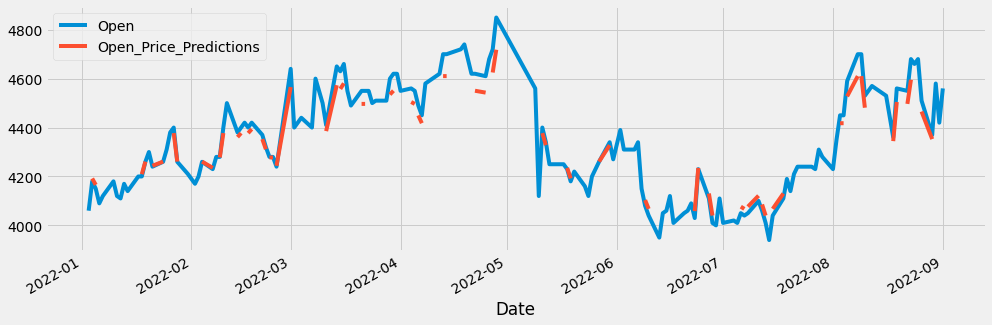

In [ ]:
_ = dataframe_concatenated[['Open','Open_Price_Predictions',]].plot(figsize=(15, 5))